In [1]:
from train import train_models
import pandas as pd
import numpy as np
from sklearn.utils.validation import column_or_1d

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/combined_freeman_2_3_4.csv')
df.head()

,Depth,GR,Log_ILD,RHOB,NPHI,PHI,PERM,well
0,6308.0,86.730,1.342,2.105,0.396,0.3300,0.2324,freeman_2
1,6308.5,79.598,1.257,2.105,0.381,0.3300,0.2324,freeman_2
2,6309.0,72.180,1.083,2.092,0.365,0.1448,572.4000,freeman_2
3,6309.5,68.811,0.973,2.072,0.373,0.1621,749.9110,freeman_2
4,6310.0,71.912,0.953,2.057,0.372,0.1750,927.9860,freeman_2


In [4]:
from class2 import Petrophysics

In [5]:
test = Petrophysics(df)

In [6]:
x = test.formation_factor(0.62, 2.15)
x.head(2)

,Depth,GR,Log_ILD,RHOB,NPHI,PHI,PERM,well,formation_factor
0,6308.0,86.730,1.342,2.105,0.396,0.33,0.2324,freeman_2,6.723365
1,6308.5,79.598,1.257,2.105,0.381,0.33,0.2324,freeman_2,6.723365


In [7]:
y = test.swirr()
y.head(2)

,Depth,GR,Log_ILD,RHOB,NPHI,PHI,PERM,well,formation_factor,swirr
0,6308.0,86.730,1.342,2.105,0.396,0.33,0.2324,freeman_2,6.723365,0.05798
1,6308.5,79.598,1.257,2.105,0.381,0.33,0.2324,freeman_2,6.723365,0.05798


In [8]:
y.head(10)

,Depth,GR,Log_ILD,RHOB,NPHI,PHI,PERM,well,formation_factor,swirr
0,6308.0,86.730,1.342,2.105,0.396,0.3300,0.2324,freeman_2,6.723365,0.057980
1,6308.5,79.598,1.257,2.105,0.381,0.3300,0.2324,freeman_2,6.723365,0.057980
2,6309.0,72.180,1.083,2.092,0.365,0.1448,572.4000,freeman_2,39.512934,0.140558
3,6309.5,68.811,0.973,2.072,0.373,0.1621,749.9110,freeman_2,30.999751,0.124498
4,6310.0,71.912,0.953,2.057,0.372,0.1750,927.9860,freeman_2,26.294195,0.114661
5,6310.5,73.837,0.931,2.050,0.375,0.1810,1019.9900,freeman_2,24.455850,0.110580
6,6311.0,73.915,0.933,2.050,0.350,0.1810,1020.4300,freeman_2,24.455850,0.110580
7,6311.5,76.560,0.931,2.052,0.352,0.3653,993.4520,freeman_2,5.403746,0.051980
8,6341.0,92.608,1.588,2.106,0.430,0.3293,0.2324,freeman_2,6.754131,0.058113
9,6341.5,88.486,1.296,2.107,0.414,0.3287,0.2324,freeman_2,6.780666,0.058227


In [9]:
z = test.permeability()
z.head(10)

,Depth,GR,Log_ILD,RHOB,NPHI,PHI,PERM,well,formation_factor,swirr,permeability
0,6308.0,86.730,1.342,2.105,0.396,0.3300,0.2324,freeman_2,6.723365,0.057980,3197.249799
1,6308.5,79.598,1.257,2.105,0.381,0.3300,0.2324,freeman_2,6.723365,0.057980,3197.249799
2,6309.0,72.180,1.083,2.092,0.365,0.1448,572.4000,freeman_2,39.512934,0.140558,862.287737
3,6309.5,68.811,0.973,2.072,0.373,0.1621,749.9110,freeman_2,30.999751,0.124498,1003.286119
4,6310.0,71.912,0.953,2.057,0.372,0.1750,927.9860,freeman_2,26.294195,0.114661,1118.765927
5,6310.5,73.837,0.931,2.050,0.375,0.1810,1019.9900,freeman_2,24.455850,0.110580,1175.488005
6,6311.0,73.915,0.933,2.050,0.350,0.1810,1020.4300,freeman_2,24.455850,0.110580,1175.488005
7,6311.5,76.560,0.931,2.052,0.352,0.3653,993.4520,freeman_2,5.403746,0.051980,3848.963584
8,6341.0,92.608,1.588,2.106,0.430,0.3293,0.2324,freeman_2,6.754131,0.058113,3184.995383
9,6341.5,88.486,1.296,2.107,0.414,0.3287,0.2324,freeman_2,6.780666,0.058227,3174.512308


In [10]:
df.columns

Index(['Depth', 'GR', 'Log_ILD', 'RHOB', 'NPHI', 'PHI', 'PERM', 'well',
       'formation_factor', 'swirr', 'permeability'],
      dtype='object')

In [11]:
df1 = df.dropna()

In [12]:
df1.isnull().sum()

Depth               0
GR                  0
Log_ILD             0
RHOB                0
NPHI                0
PHI                 0
PERM                0
well                0
formation_factor    0
swirr               0
permeability        0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import joblib

In [14]:
# Define input features and target variable
X = df1[['Depth', 'GR', 'Log_ILD', 'RHOB', 'NPHI', 'PHI']]
y = df1['PERM']

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define dictionary of models and their hyperparameters
models = {
    'svm': {
        'model': make_pipeline(StandardScaler(), SVR()),
        'params': {
            'svr__kernel': ['linear', 'rbf', 'poly'],
            'svr__C': [0.1, 1, 10],
            'svr__gamma': ['scale', 'auto']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [10, 20, 30]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'neural_network': {
        'model': MLPRegressor(),
        'params': {
            'hidden_layer_sizes': [(10,), (20,), (30,)],
            'activation': ['relu', 'tanh', 'logistic']
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'learning_rate': [0.05, 0.1, 0.2],
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 7]
        }
    }
}

In [16]:
scores = []
# Loop over each model and perform grid search with cross-validation to find best hyperparameters 
## scoring='neg_mean_squared_error'
for model_name, model in models.items():
    clf = GridSearchCV(model['model'], model['params'], cv=5, n_jobs=-1, return_train_score=False)
    clf.fit(X_train, y_train)
    best_params = clf.best_params_
    
    # Evaluate best model on test set
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = clf.score(X_test, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': best_params,
        'RMSE': rmse,
        'R-squared': r2
    })
    # Save the best model for each method
    joblib.dump(clf.best_estimator_, f"models/{model_name}_best_model_pe.pkl")

In [17]:
best_model_df = pd.DataFrame(scores, columns=['model', 'best_params', 'best_score', 'RMSE', 'R-squared'])
best_model_df

,model,best_params,best_score,RMSE,R-squared
0,svm,"{'svr__C': 10, 'svr__gamma': 'scale', 'svr__ke...",-0.001824,9.083552e+10,-0.002594
1,random_forest,"{'max_depth': 30, 'n_estimators': 50}",0.816038,1.342157e+10,0.978111
2,decision_tree,"{'max_depth': 10, 'min_samples_split': 5}",0.803430,3.358943e+10,0.862906
3,neural_network,"{'activation': 'relu', 'hidden_layer_sizes': (...",-0.001824,9.083550e+10,-0.002594
4,gradient_boosting,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.832086,1.043647e+10,0.986765


In [18]:
best_model_df.to_csv('data/best_model_pe.csv', index=False)

In [19]:
# Load the models from the model folder
model_rf = joblib.load('models/random_forest_best_model_pe.pkl')
model_dt = joblib.load('models/decision_tree_best_model_pe.pkl')
model_gb = joblib.load('models/gradient_boosting_best_model_pe.pkl')
model_nn = joblib.load('models/neural_network_best_model_pe.pkl')

In [20]:
# Predict y values for x_test
y_pred_rf = model_rf.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_gb = model_gb.predict(X_test)
y_pred_nn = model_nn.predict(X_test)

X_test_df = pd.DataFrame(X_test, columns=['Depth', 'GR', 'Log_ILD', 'RHOB', 'NPHI', 'PHI'])

# Create a dataframe with x_test, y_test, and y_predict
results_df = pd.DataFrame({'Depth': X_test_df['Depth'],
                           'Log_ILD': X_test_df['Log_ILD'],
                           'NPHI': X_test_df['PHI'],
                           'RHOB': X_test_df['RHOB'],
                           'vshale': X_test_df['GR'],
                           'NPHI': X_test_df['NPHI'],
                           'Actual Permeability': y_test,
                           'rf_Permeability': y_pred_rf,
                           'dt_Permeability': y_pred_dt,
                           'gb_Permeability': y_pred_gb,
                           'nn_pore pressure': y_pred_nn
                          })

# Print the dataframe
results_df.to_csv('results_test_pe.csv', index=False)
results_df.head()

,Depth,Log_ILD,NPHI,RHOB,vshale,Actual Permeability,rf_Permeability,dt_Permeability,gb_Permeability,nn_pore pressure
8216,9187.0,1.1906,0.5495,2.2775,92.2258,16.977470,17.220364,161274.280009,1.004733e+07,1.188380e+06
896,11241.0,1.6480,0.3860,2.4750,154.8270,1571.569900,1907.097383,161274.280009,1.004733e+07,1.459089e+06
7580,8869.0,0.9187,0.6678,2.2750,88.2825,18.359861,18.465291,161274.280009,1.004733e+07,1.147157e+06
9040,9599.0,0.8015,0.5088,2.3399,95.1580,2.500119,2.424404,161274.280009,1.004733e+07,1.241450e+06
5403,7780.5,0.8852,0.5750,2.2336,93.3830,65.435171,65.621211,161274.280009,1.004733e+07,1.008365e+06


In [21]:
# Predict y values for x_train
y_pred_rf_train = model_rf.predict(X_train)
y_pred_dt_train = model_dt.predict(X_train)
y_pred_gb_train = model_gb.predict(X_train)
y_pred_nn_train = model_nn.predict(X_train)

X_train_df = pd.DataFrame(X_train, columns=['Depth', 'GR', 'Log_ILD', 'RHOB', 'NPHI', 'PHI'])

# Create a dataframe with x_test, y_test, and y_predict
train_df = pd.DataFrame({'Depth': X_train_df['Depth'],
                           'Log_ILD': X_train_df['Log_ILD'],
                           'NPHI': X_train_df['PHI'],
                           'RHOB': X_train_df['RHOB'],
                           'vshale': X_train_df['GR'],
                           'NPHI': X_train_df['NPHI'],
                           'Actual Permeability': y_train,
                           'rf_Permeability': y_pred_rf_train,
                           'dt_Permeability': y_pred_dt_train,
                           'gb_Permeability': y_pred_gb_train,
                           'nn_pore pressure': y_pred_nn_train
                        })

# Print the dataframe
train_df.to_csv('results_pe.csv', index=False)
train_df.head()

,Depth,Log_ILD,NPHI,RHOB,vshale,Actual Permeability,rf_Permeability,dt_Permeability,gb_Permeability,nn_pore pressure
4486,7322.0,0.7423,0.5810,2.2157,92.4503,113.184296,109.425184,161274.280009,1.004733e+07,9.495172e+05
7812,8985.0,0.8701,0.6908,2.2623,86.6754,27.030352,27.182401,161274.280009,1.004733e+07,1.161813e+06
2850,6504.0,1.1510,0.5166,2.1013,39.2862,0.463487,0.743575,161274.280009,1.004733e+07,8.382970e+05
6927,8542.5,0.7200,0.5452,2.2016,84.9408,174.488323,174.338209,161274.280009,1.004733e+07,1.104896e+06
6772,8465.0,0.8374,0.5442,2.2289,86.7401,75.475277,75.300782,161274.280009,1.004733e+07,1.095205e+06


In [22]:
i = df1[['Depth', 'GR', 'Log_ILD', 'RHOB', 'NPHI', 'PHI', 'PERM', 'well', 'formation_factor', 'swirr']]
j = df1['PERM']

In [23]:
from sklearn.linear_model import LassoCV

reg = LassoCV(alphas=[0.1, 1, 10])
reg.fit(X, y)

# Retrieve the selected variables and their coefficients
coef = pd.Series(reg.coef_, index=X.columns)

# Print the selected variables and their coefficients
selected_variables = coef[coef != 0]
print(selected_variables)

Depth      7.157581e+07
GR         2.600088e+08
Log_ILD   -7.546556e+07
RHOB      -9.640835e+11
NPHI       1.438050e+11
PHI        2.209496e+11
dtype: float64


In [24]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 18631728714218.046875
Best score using built-in LassoCV: 0.000242


In [25]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 1 variables and eliminated the other 5 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

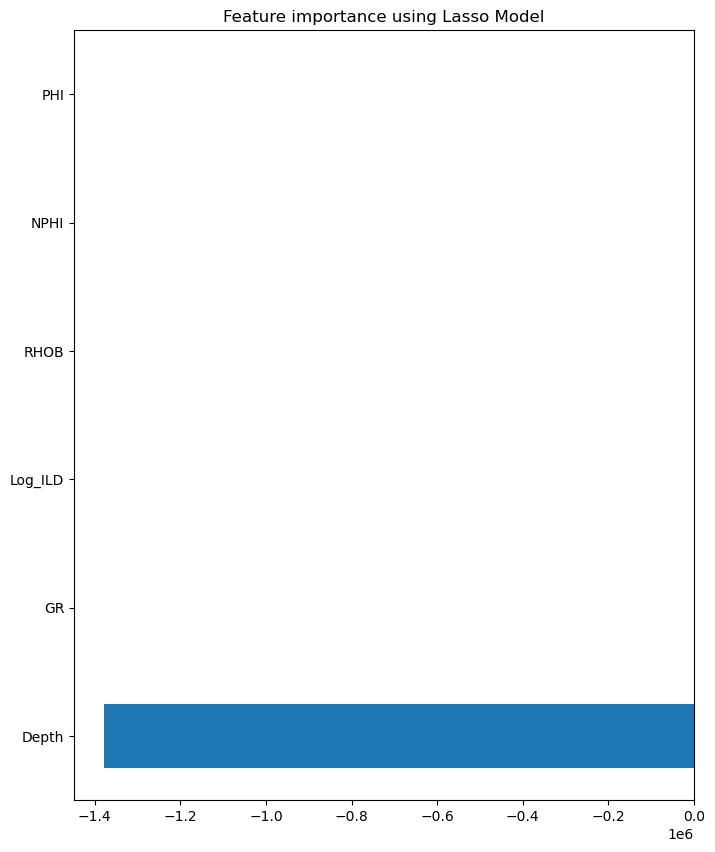

In [26]:
imp_coef = coef.sort_values()
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [27]:
import statsmodels.api as sm

def forward_selection(X, y, threshold=0.05):
    selected_features = []
    remaining_features = set(X.columns)
    
    while remaining_features:
        best_pvalue = float('inf')
        best_feature = None
        
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            pvalue = model.pvalues[feature]
            
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature
        
        if best_pvalue < threshold:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    
    return selected_features

selected_features_forward = forward_selection(X, y)
print(selected_features_forward)

['RHOB', 'Depth', 'PHI', 'NPHI', 'Log_ILD']


In [28]:
import statsmodels.api as sm

def backward_elimination(X, y, threshold=0.05):
    selected_features = list(X.columns)
    
    while True:
        model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
        pvalues = model.pvalues.iloc[1:]  # Exclude the constant term
        
        if pvalues.max() > threshold:
            feature_to_remove = pvalues.idxmax()
            selected_features.remove(feature_to_remove)
        else:
            break
    
    return selected_features

selected_features_backward = backward_elimination(X, y)
print(selected_features_backward)

['Depth', 'Log_ILD', 'RHOB', 'NPHI', 'PHI']


In [29]:
import statsmodels.api as sm

def stepwise_selection(X, y, threshold_in=0.05, threshold_out=0.05):
    selected_features = []
    remaining_features = set(X.columns)
    
    while remaining_features:
        best_pvalue = float('inf')
        best_feature = None
        
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            pvalue = model.pvalues[feature]
            
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature
        
        if best_pvalue < threshold_in:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    
    while selected_features:
        model = sm.OLS(y, sm.add_constant(X[selected_features])).fit()
        pvalues = model.pvalues.iloc[1:]  # Exclude the constant term
        
        if pvalues.max() > threshold_out:
            feature_to_remove = pvalues.idxmax()
            selected_features.remove(feature_to_remove)
        else:
            break
    
    return selected_features

selected_features_stepwise = stepwise_selection(X, y)
print(selected_features_stepwise)

['RHOB', 'Depth', 'PHI', 'NPHI', 'Log_ILD']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(df, column, num_samples=1000):
    # Sample a subset of data
    df_sample = df.sample(n=num_samples, random_state=42)

    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Plot the histogram
    sns.histplot(data=df_sample, x=column, kde=True)

    # Set the plot title and axis labels
    plt.title('Histogram of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Count')

    # Show the plot
    plt.show()

# Plot the histogram
plot_histogram(df, 'PERM', num_samples=100)
